In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import *

#### Primero estimaremos la dependencia de la coherencia respecto a los valores de SNR para imágenes complejas con ruido aleatorio de media igual a cero mediante la relación: 
#### $$\gamma=\frac{SNR}{SNR+1}$$

In [2]:
snr_array = np.array([1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4]) 
coh_array = snr_array/(1+snr_array)

Text(0.5, 1.0, 'Coherence ($\\gamma$) vs SNR')

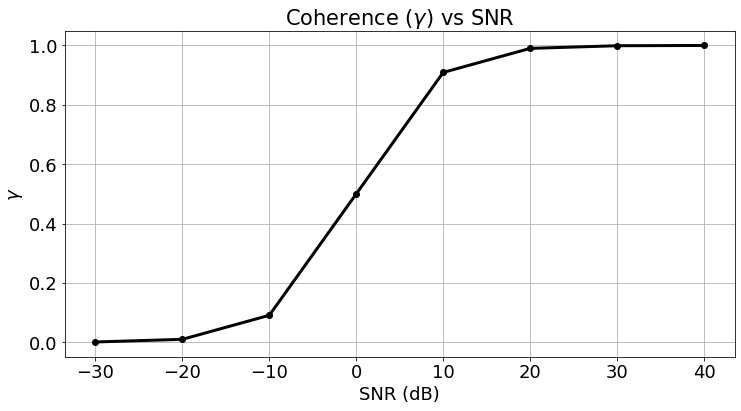

In [3]:
fontsize = 18
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(10*np.log10(snr_array),coh_array,color='black',lw=3,marker='o')
ax.set_ylabel(r'$\gamma$',fontsize=fontsize)
ax.set_xlabel(r'SNR (dB)',fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.grid()
ax.set_title(r'Coherence ($\gamma$) vs SNR', fontsize=fontsize+3)

#### Recordamos del reporte anterior que podemos estimar la varianza de la fase teórica ($\sigma_\phi$) de la siguiente relación$^{[1]}$:

$$ \sigma^2_\phi = \frac{\pi^2}{3} - \pi\arcsin(|\gamma|) + \arcsin^2(|\gamma|)-\frac{Li_2(|\gamma|^2)}{2}$$

Donde $Li_2$ es la llamada función di-logaritmo de Euler, dada por la siguiente expresión:

$$ Li_2(|\gamma|^2) = \sum^{\infty}_{k=1} \frac{|\gamma|^{2k}}{k^2}$$

Que es el caso un caso especial de la función polilogarítmica. Para resolverla usaremos la librería $\textit{mpmath$^{[2]}$}$

##### [1]Rödelsperger, Sabine <http://tuprints.ulb.tu-darmstadt.de/view/person/R=F6delsperger=3ASabine=3A=3A.html> (2011)Real-time Processing of Ground Based Synthetic Aperture Radar (GB-SAR) Measurements. Book, Primary publication
##### [2]mpmath - Python library for arbitrary-precision floating-point arithmetic. (2023, March 07). Retrieved from https://mpmath.org

In [4]:
li2_arr = np.array([polylog(2, np.abs(coh)**2) for coh in coh_array])
sigma_array = (1/3)*np.pi**2 - np.pi*np.arcsin(np.abs(coh_array)) \
+ np.arcsin(np.abs(coh_array))**2 -(1/2)*li2_arr

Text(0.5, 1.0, '$\\sigma_\\phi$ vs coherence ($\\gamma$)')

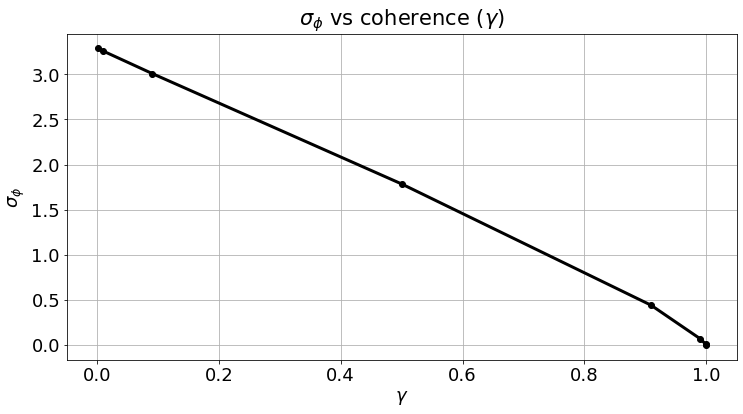

In [5]:
fontsize = 18
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(coh_array,sigma_array,color='black',lw=3,marker='o')
ax.set_ylabel(r'$\sigma_\phi$',fontsize=fontsize)
ax.set_xlabel(r'$\gamma$',fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.grid()
ax.set_title(r'$\sigma_\phi$ vs coherence ($\gamma$)', fontsize=fontsize+3)

Text(0.5, 1.0, '$\\sigma_\\phi$ vs SNR')

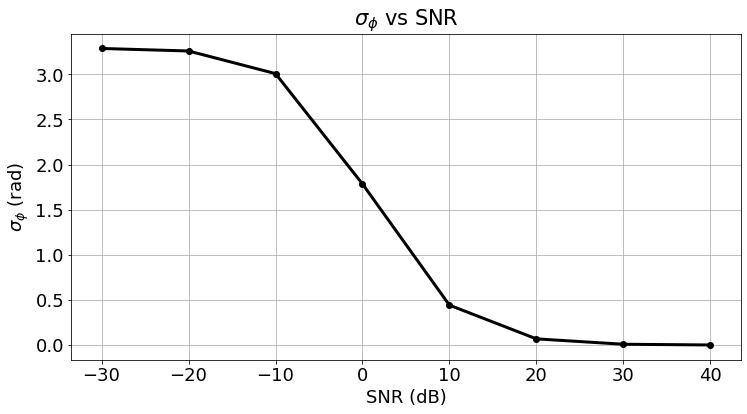

In [6]:
fontsize = 18
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(10*np.log10(snr_array),sigma_array,color='black',lw=3,marker='o')
ax.set_ylabel(r'$\sigma_\phi$ (rad)',fontsize=fontsize)
ax.set_xlabel(r'SNR (dB)',fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.grid()
ax.set_title(r'$\sigma_\phi$ vs SNR', fontsize=fontsize+3)


Implementar la estimación de la varianza del desplazamiento de la siguiente manera: 
1. Crear una serie de tiempo de realizaciones de la misma imagen.
2. Estimar la diferencia de fase entre imágenes consecutivas sobre la zona de interés: 

$$ \Delta\phi = \angle (I_j I_{j+1}^*)$$

Esta fase se relaciona con el desplazamiento $\Delta r\$ de la siguiente manera:
$$ \Delta r = \Delta \phi \frac{\lambda}{4\pi} $$
3. Estimar la varianza de la serie de tiempo del desplazamiento.